# Lecture 6: Eigenvalues (and eigenvectors)

## Recap of the previous lecture
- Linear systems
- Gaussian elimination
- LU decomposition
- Condition number as a measure of forward stability of the problem.

## Today lecture
Today we will talk about:
- Eigenvectors and their applications (PageRank)
- Gershgorin circles
- Computing eigenvectors using power method
- Schur theorem
- Normal matrices

## What is an eigenvector?
A vector $x \ne 0$ is called an **eigenvector** of a square matrix $A$ if there exists a number $\lambda$ such that  
$$
   Ax = \lambda x.
$$
The number $\lambda$ is called an **eigenvalue**.  
The names **eigenpair** and **eigenproblem** are also used.

Since $A - \lambda I$ should have a non-trivial kernel, 
eigenvalues are the roots of the characteristic polynomial

$$ \det (A - \lambda I) = 0.$$

## Eigendecomposition
If matrix $A$ of size $n\times n$ has $n$ eigenvectors $s_i$, $i=1,\dots,n$:
$$
As_i = \lambda_i s_i,
$$
then this can be written as
$$
A S = S \Lambda, \quad\text{where}\quad S=(s_1,\dots,s_n), \quad \Lambda = \text{diag}(\lambda_1, \dots, \lambda_n),
$$
or equivalently
$$
A = S\Lambda S^{-1}.
$$
This is called **eigendecomposition** of a matrix. Matrices that can be represented by their eigendecomposition are called **diagonalizable**.

#### Existence

What classes of matrices are diagonalizable?

Simple example can be matrices with all different eigenvalues.
More generally, matrix is diagonalizable iff **algebraic multiplicity** of each eigenvalue (mutiplicity of eigenvalue in the characteristic polynomial) is equal to its **geometric multiplicity** (dimension of eigensubspace). 

For our purposes the most important class of diagonalizable matrices are **normal matrices**: $$AA^* = A^* A$$. You will learn how to prove that normal matrices are diagonalizable after a few slides (Schur decomposition topic).

#### Example

* You can simply check that, e.g. matrix $$A = \begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}$$ has one eigenvalue $1$ of multimplicity $2$ (since its characteristic polynomial is $p(\lambda)=(1-\lambda)^2$), but only one eigenvector $\begin{pmatrix} c \\ 0  \end{pmatrix}$ and hence is not diagonalizable.

## Why eigenvectors and eigenvalues are important?
Eigenvectors are both important auxiliary tools and also play important role in applications.  
To start with all our microworld is governed by the **Schrodinger equation** which is an eigenvalue problem.  
$$
    H \psi = E \psi,
$$
where $E$ is the ground state energy, $\psi$ is called wavefunction and $H$ is the Hamiltonian.  
More than 50% of the computer power is spent on solving this type of problems for computational material / drug design.

## Eigenvalues are vibrational frequencies

A typical computation of eigenvectors / eigenvectors is for studying 

- Vibrational computations of mechanical structures
- Model order reduction of complex systems

In [1]:
from IPython.display import YouTubeVideo 
YouTubeVideo("xKGA3RNzvKg")

## Google PageRank
One of the most famous eigenvectors computation is the **Google PageRank**. 
It is not actively used by Google nowadays, but it was one of the main features in its early stages. The question is how do we rank webpages, which one is important, and which one is not. 
All we know about the web is which page refers to which. PageRank is defined by a recursive definition. Denote by $p_i$ the **importance** of the $i$-th page. Then we define this importance as an average value of all importances of all pages that refer to the current page. It gives us a linear system  
$$
    p_i = \sum_{j \in N(i)} \frac{p_j}{L(j)},
$$
where $L(j)$ is the number of outgoing links on the $j$-th page, $N(i)$ are all the neighbours of the $i$-th page. It can be rewritten as  
$$
   p = G p, \quad G_{ij} = \frac{1}{L(j)}
$$
or as an eigenvalue problem

$$
   Gp = 1 p,
$$

i.e. the eigenvalue $1$ is already known. Note that $G$ is **left stochastic**, i.e. its columns sum up to $1$. 
Check that any left stochastic matrix has maximum eigenvalue equal to $1$.

## Demo
We can compute PageRank using some Python packages. 
We will use ```networkx``` package for working with graphs that can be installed using  
```conda install networkx```

We will use a simple example of Zachary karate club network. This data was manually collected in 1977, and is a classical social network dataset.

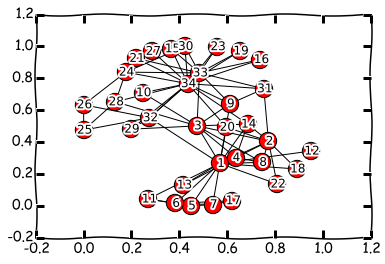

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
kn = nx.read_gml('karate.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph

Now we can actually compute the PageRank using the NetworkX built-in function. We also plot 
the size of the nodes larger if its PageRank is larger.

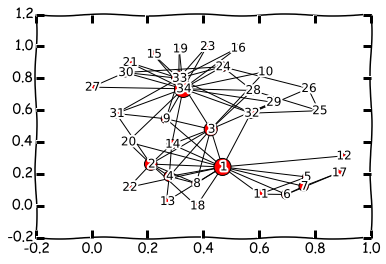

In [4]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = pr.values()
#pr_vector = [pr[i+1] for i in xrange(len(pr))]
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)
#plt.tight_layout()
#plt.title('PageRank nodes')

## Computations of eigenvalues

How to compute  eigenvalues and eigenvectors? 

There are two types of eigenproblems

- Full eigenproblem (all eigenvalues & eigenvectors are required)
- Partial eigenvalues (minimal/maximal eigenvalues, eigenvalues within the specified region).

## Computation of the eigenvalues via characteristic equations
The eigenvalue problem has the form  
$$
    Ax = \lambda x, 
$$
or 
$$
   (A - \lambda I) x = 0,
$$
therefore matrix $A - \lambda I$ has non-trivial nullspace and should be singular. That means, that the **determinant**  

$$
   p(\lambda) = \det(A - \lambda I) = 0.
$$

The equation is called **characteristic equations** and is a polynomial of order $n$.    
The $n$-degree polynomial has $n$ complex roots!

## Recall the determinant
The determinant of a square matrix $A$ is defined as 

$$\det A = \sum_{\sigma \in S_n} \mathrm{sgn}({\sigma})\prod^n_{i=1} a_{i, \sigma_i},$$

where $S_n$ is the set of all **permutations** of the numbers $1, \ldots, n$,

and $\mathrm{sgn}$ is the **signature** of the permutation ( $(-1)^p$ where $p$ is the number of transpositions to be made).

(**Checkout** video "The Execution of Determinant" on the Gilbert Strang lecture at MIT)

In [5]:
from IPython.display import YouTubeVideo 
YouTubeVideo("amv58LCqCMI")

## Properties of determinant
Determinant has many nice properties:

1. $\det(AB) = \det(A) \det(B)$
2. If we have one row as a sum of two vectors, determinant is a sum of two determinants
3. "Minor expansion": we can expand  determinant through a selected row or column.

If you do it via **minor expansion**, we get **exponential** complexity in $n$.

Can we do $\mathcal{O}(n^3)$? 

## Eigenvalues and characteristic equation

Now we go back to the eigenvalues.

The characteristic equation can be used to compute the eigenvalues, which leads to **naive** algorithm:

$$p(\lambda) = \det(A - \lambda I)$$

1. Compute coefficients of the polynomial
2. Compute the roots

**Is this a good idea**?   

**Give your feedback**

We can do a short demo of this

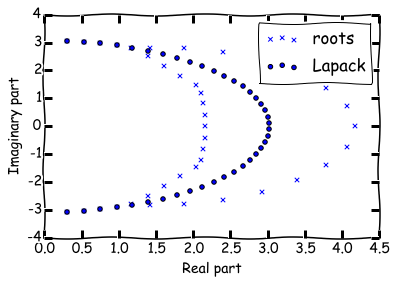

In [17]:
import numpy as np
n = 40
a = [[1.0 / (i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
ev = np.linalg.eigvals(a)
#print 'Eigenvalues using Lapack function:', ev
#There is a special numpy function for chacteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
#print 'Coefficients of the polynomial:', cf
#print 'Polynomial roots:', ev_roots
plt.scatter(ev_roots.real, ev_roots.imag, marker='x', label='roots')
b = a + 0 * np.random.randn(n, n)
ev_b = np.linalg.eigvals(b)
plt.scatter(ev_b.real, ev_b.imag, marker='o', label='Lapack')
#plt.scatter(ev_roots.real, ev_roots.imag, marker='o', label='Brute force')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

**Morale**: 

- Do not do that, unless you have a reason. 
- Polynomial rootfinding is very **ill-conditioned** (can be much better, but not with monomials $\{1,x,x^2,\dots\}$!). Note that Gram matrix of monomials $$h_{ij} = \int_0^1 x^i x^j\, dx = \frac{1}{i+j+1},$$
is the Hilbert matrix, which has exponential decay of singular values. So, monomials are "almost" linearly dependent.

## Gershgorin circles
There is a very interesting theorem that sometimes helps to localize the eigenvalues. 

It is called **Gershgorin theorem**.  

It states that all eigenvalues $\lambda_i,  i = 1, \ldots, n$ are located inside the union of **Gershgorin circles** $C_i$,  where $C_i$ is a disk on the complex plane with center $a_{ii}$ and radius  

$$r_i = \sum_{j \ne i} |a_{ij}|.$$

Moreover, if the circles do not intersect they contain only one eigenvalue per circle. The proof is instructive since it uses the concepts we looked at the previous lectures.

## Proof
First, we need to show that if the matrix $A$ is strictly diagonally dominant, i.e. 

$$
   |a_{ii}| > \sum_{j \ne i} |a_{ij}|,
$$
then such matrix is non-singular.

We separate the diagonal part and off-diagonal part, and get  

$$
    A = D + S = D( I + D^{-1}S),
$$

and $\Vert D^{-1} S\Vert_1 < 1$. Therefore, by using the **Neumann series**, the matrix $I + D^{-1}S$ is invertible and hence $A$ is invertible.

Now the proof follows by contradiction: 

if any of the eigenvalues lies outside all of the circles, the matrix $(A - \lambda I)$ 

is strictly diagonally dominant, and thus is invertible. 

That means, that $(A - \lambda I) x = 0$ means $x = 0$. 

## A short demo

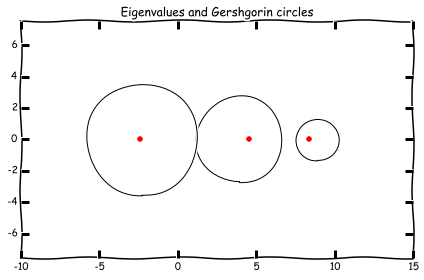

In [24]:
import numpy as np
%matplotlib inline
n = 3
fig, ax = plt.subplots(1, 1)
a = [[5, 1, 1], [1, 0, 0.5], [2, 0, 10]]
#a = [[1.0 / (i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
#a = np.diag(np.arange(n))
a = a +2*np.random.randn(n, n)
#u = np.random.randn(n, n)
#a = np.linalg.inv(u).dot(a).dot(u)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in xrange(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, label='x', color='r')
plt.axis('equal')
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

**Note**: There are more complicated figures, like **Cassini ovals**, that include the spectrum
$$
    M_{ij} = \{z\in\mathbb{C}: |a_{ii} - z|\cdot |a_{jj} - z|\leq r_i r_j\}, \quad r_i = \sum_{l\not= i} |a_{il}|.
$$

## Power method
We are often interested in the computation of the part of the spectrum, like the largest eigenvalues, smallest eigenvalues. Also it is interesting to note that for the Hermitian matrices $(A = A^*)$ the eigenvalues are always real (prove it!).  

A power method is the simplest method for the computation of the largest eigenvalue in modulus. It is also our first example of the **iterative method** and **Krylov method**.

## Power method

The eigenvalue problem

$$Ax = \lambda x, \quad \Vert x \Vert = 1 \ \text{for stability}.$$ 

can be rewritten as a **fixed-point iteration**, which is called **power method** and finds the largest eigenvalue of $A$.

Power method has the form

$$
    x_{k+1} = A x_k, \quad x_{k+1} := \frac{x_{k+1}}{\Vert x_{k+1} \Vert_2}.
$$

and $x_{k+1}\to v_1$, where $Av_1 = \lambda_1 v_1$ and $\lambda_1$ is the largest eigenvalue and $v_1$ is the corresponding eigenvector.

On $k+1$-th iteration approximation to $\lambda_1$ - the largest eigenvalue can be found as

$$
    \lambda^{(k+1)} = (Ax_{k+1}, x_{k+1}),
$$

Note that $\lambda^{(k+1)}$ is not required for the $k+2$-th iteration, but might be useful to measure error on each iteration: $\|Ax_{k+1} - \lambda^{(k+1)}x_{k+1}\|$. 

The convergence is geometric, but the convergence ratio is $q^k$, where $q = \left|\frac{\lambda_{2}}{\lambda_{1}}\right| < 1$, for $\lambda_1>\lambda_2\geq\dots\geq \lambda_n$ and $k$ is the number of iteration. It means, the convergence can be artitrary small. To prove it, it is sufficient to consider a $2 \times 2$ diagonal matrix.

## Convergence analysis for $A=A^*$

Let's have a more precise look at the power method when $A$ is Hermitian.
In two slides you will learn that every Hermitian matrix is diagonalizable. Therefore, there exists orthonormal basis of eigenvectors $v_1,\dots,v_n$ such that $Av_i = \lambda_i v_i$. Let us decompose $x_0$ into a sum of $v_i$ with coefficients $c_i$:
$$
x_0 = c_1 v_1 + \dots + c_n v_n.
$$
Since $v_i$ are eigenvectors, we have
$$
\begin{split}
x_1 &= \frac{Ax_0}{\|Ax_0\|} = \frac{c_1 \lambda_1 v_1 + \dots + c_n \lambda_n v_n}{\|c_1 \lambda_1 v_1 + \dots + c_n \lambda_n v_n \|}  \\
&\vdots\\
x_k &= \frac{Ax_{k-1}}{\|Ax_{k-1}\|} = \frac{c_1 \lambda_1^k v_1 + \dots + c_n \lambda_n^k v_n}{\|c_1 \lambda_1^k v_1 + \dots + c_n \lambda_n^k v_n \|}
\end{split}
$$
Now you see, that 
$$
x_k = \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\frac{ v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2 + \dots + \frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n}{\left\|v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2 + \dots + \frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n\right\|},
$$
which converges to $v_1$ since $\left| \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\right| = 1$ and $\left(\frac{\lambda_2}{\lambda_1}\right)^k \to 0$ if $|\lambda_2|<|\lambda_1|$.

## Things to remember about the power method
- One step requires one matrix-by-vector product. If the matrix allows for an $\mathcal{O}(n)$ matvec (for example, it is sparse), 
  then it is possible.
- Convergence can be slow
- If only a rough estimate is needed, only a few iterations are needed
- The solution vector is in the **Krylov subspace** $\{x_0, Ax_0,\dots,A^{k}x_0\}$ and has the form $\mu A^k x_0$, where $\mu$ is the normalization constant. 


#  Matrix decomposition: the Schur form
There is one class of matrices when eigenvalues can be found easily: **triangular matrices**

$$
  A = \begin{pmatrix}
   \lambda_1 & * & * \\
   0 & \lambda_2 & * \\
   0 & 0 & \lambda_3 \\
  \end{pmatrix}.
$$
The eigenvalues of $A$ are $\lambda_1, \lambda_2, \lambda_3$. Why? 

Because the determinant is  
$$
   \det(A - \lambda I) = (\lambda - \lambda_1) (\lambda - \lambda_2) (\lambda - \lambda_3).
$$

Thus, computing the eigenvalues of triangular matrices is easy. Now, the unitary matrices come to help. Let $U$ be a unitary matrix, i.e. $U^* U = I$.  Then 

$$
   \det(A - \lambda I) = \det(U (U^* A U - \lambda I) U^*) = \det(UU^*) \det(U^* A U - \lambda I) = \det(U^* A U - \lambda I),
$$

where we have used the famous multiplicativity property of the determinant, $\det(AB) = \det(A) \det(B)$. It means,  
that the matrices $U^* A U$ and $A$ have the same characteristic polynomials, and the same eigenvalues. 

If we manage to make $U^* A U = T$ where $T$ is **upper triangular**, then we are done.  Multplying from the left and the right by $U$ and $U^*$ respectively, we get the desired decomposition:  

$$
    A = U T U^*.
$$

This is the celebrated **Schur decomposition**. Recall that unitary matrices imply stability, thus the eigenvalues are computed very accurately. The Schur decomposition shows why we need matrix decompositions: it represents a matrix into a product of three matrices with a convenient structure.  

## Schur theorem
**Theorem:** Every $A \in \mathbb{C}^{n \times n}$ matrix can be represented in the Schur form $A = UTU^*$, where $U$ is unitary and $T$ is upper triangular.  
** Sketch of the proof**.
1. Every matrix has at least $1$ non-zero eigenvector (take a root of characteristic polynomial, $(A-\lambda I)$ is singular, has    non-trivial nullspace). Let $$Av_1 = \lambda_1 v_1, \quad \Vert v_1 \Vert_2 = 1$$
2. Let $U_1 = [v_1,v_2,\dots,v_n]$, where $v_2,\dots, v_n$ are any vectors othogonal to $v_1$. Then 
  $$
      U^*_1 A U_1 = \begin{pmatrix}
      \lambda_1 & *  \\
      0 & A_2 
      \end{pmatrix},
  $$
  where $A_2$ is an $(n-1) \times (n-1)$ matrix. This is called **block triangular form**. We can now work with $A_2$ only and so on.  
  
  
**Note**: Since we need eigenvectors in this proof, this proof is not a practical algorithm.

## Application of the Schur theorem
Important application of the Schur theorem:  **Normal matrices**.  
**Definition.** Matrix $A$ is called **normal matrix**, if  
$$
    AA^* = A^* A.
$$

**Q:** Examples of normal matrices?

Example: Hermitian matrices, unitary matrices.  

## Normal matrices
**Theorem**: $A$ is a **normal matrix**, iff $A = U \Lambda U^*$, where $U$ is unitary and $\Lambda$ is diagonal. 

**Sketch of the proof:** One way is straightforward (if the decomposition holds, the matrix is normal).  
The other is more complicated. Consider the Schur form of the matrix $A$. Then $AA^* = A^*A$ means $TT^* = T^* T$.  
By looking at the elements we immediately see, 
that the only upper triangular matrix $T$ that satisfies $TT^* = T^* T$ is a diagonal matrix! $\blacksquare$

#### Important consequence

Therefore, every normal matrix is **unitary diagonalizable**, which means that it can be diagonalized by unitary matrix $U$. In other words every normal matrix has orthogonal basis of eigenvectors.

## How we compute the Schur decomposition?

Everything is fine, but how you compute the Schur form?

This we will cover in the next lecture.

## Variational principle for eigenvalues

In many cases, minimal/maximal eigenvalues are needed. Then, if $A$ is a Hermitian matrix, 

the **Rayleigh quotient** is defined as

$$R_A(x) = \frac{(Ax, x)}{(x, x)},$$

and the maximal eigenvalue is the maximum of $R_A(x)$, and the minimal eigenvalue is the minimal of $R_A(x)$. 

Thus, we can use optimization method to find these **extreme eigenvalues**.

Now, "advanced" concept.

## Spectrum and pseudospectrum


For linear dynamical systems given by the matrix $A$, spectrum can tell a lot about the system (i.e. stability, ...)

However, for **non-normal matrices**, spectrum can be unstable with respect to small perturbations.

In order to measure such perturbation, the notion of **pseudospectrum** has been developed.

## Pseudospectrum

We consider the union of all possible eigenvalues of all perturbations of the matrix $A$.

$$\Lambda_{\epsilon}(A) = \{ \lambda \in \mathbb{C}: \exists E, x \ne 0: (A + E) x = \lambda x, \quad \Vert E \Vert_2 \leq \epsilon. \}$$

For small $E$ and normal $A$ these will be circules around eigenvalues, for non-normal matrices, the structure can be much different. More details: http://www.cs.ox.ac.uk/pseudospectra/

<img src='orrsomm.gif' /img>

## Summary of todays lecture

- Eigenvalues, eigenvectors
- Gershgorin theorem
- Power method
- Schur theorem 
- Normal matrices
- Some advanced topics



## Next lecture
- Matrix factorizations and how we compute them.

##### Questions?

In [25]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()